## Sales Analysis

#### AAL is a household name in Australia, known for its clothing business since 2000. It caters to all groups— kids, women, men, and seniors. It has opened branches in many states in Australia, in metropolises and tier-1 and tier-2 cities. 

#### The business is booming, and the company is in an expansion mode. It wants to get an in-depth understanding of its sales so that it can make investment decisions. The CEO has tasked the Head of Sales and Marketing (S&M) of AAL to:

#### Determine the states that are generating the highest revenues and Formulate sales programs for states with lower revenues. The Head of S&M has approached you for the same.

#### Analyze the company’s sales data for the fourth quarter across Australia, and state by state and help the company make data-driven decisions for the coming year.


### perform the following main steps on the enclosed data:

#### Data Wrangling
#### Data Analysis
#### Data Visualization and
#### Report Generation


In [62]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file into a DataFrame
file_path = '1688639662_ausapparalsales4thqrt2020.xlsx'
df = pd.read_excel(file_path)

# Inspect for missing data
print("Missing Data Overview:\n", df.isna().sum())

# Rows with missing data
print("\nRows with Missing Data:")
print(df[df.isna().any(axis=1)])

Missing Data Overview:
 Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

Rows with Missing Data:
Empty DataFrame
Columns: [Date, Time, State, Group, Unit, Sales]
Index: []


#### Based on your knowledge of Data Analytics, include your recommendations for treating missing data and incorrect data. (dropping the null values or filling them). Since we have no Null Values, we do not need to drop NA. 

### Select an appropriate Data Wrangling approach —  data standardization or data normalization. Perform the standardization or normalization and present the data. 
### (Normalization is the preferred approach for this problem):

In [63]:
# Select numeric columns for normalization
numeric_columns = ['Unit', 'Sales']  # Replace with your actual numeric columns
df_numeric = df[numeric_columns]

# Apply Min-Max Normalization
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Concatenate normalized data with the rest of the dataframe
df[df_normalized.columns] = df_normalized

# Display normalized data
print(df.head())

        Date        Time State     Group      Unit     Sales
0 2020-10-01     Morning    WA      Kids  0.095238  0.095238
1 2020-10-01     Morning    WA       Men  0.095238  0.095238
2 2020-10-01     Morning    WA     Women  0.031746  0.031746
3 2020-10-01     Morning    WA   Seniors  0.206349  0.206349
4 2020-10-01   Afternoon    WA      Kids  0.015873  0.015873


### Share your recommendation on the usage of the groupby() function for data chunking or merging :

State
 NSW    441.714286
 NT     109.079365
 QLD    177.888889
 SA     339.412698
 TAS    110.222222
 VIC    635.968254
 WA     106.365079
Name: Sales, dtype: float64


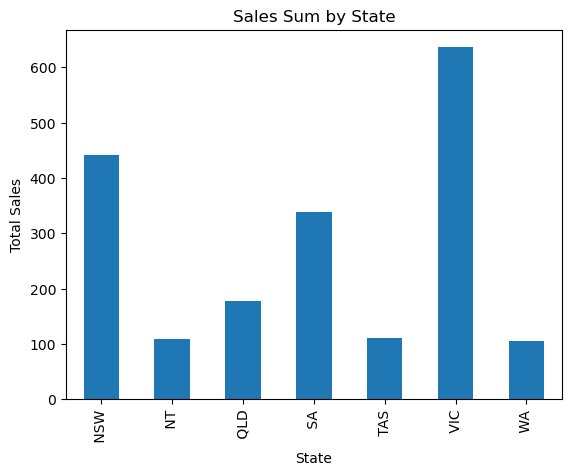

In [64]:
# Group by state and sum up sales
state_sales = df.groupby('State')['Sales'].sum()
print(state_sales)
state_sales.plot(kind='bar')
plt.title('Sales Sum by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

Group
 Kids       0.254044
 Men        0.256320
 Seniors    0.250567
 Women      0.255287
Name: Sales, dtype: float64


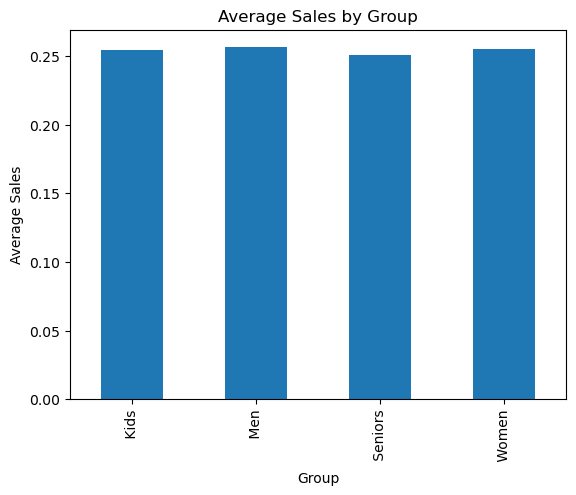

In [65]:
# Group by group and calculate average sales
group_sales = df.groupby('Group')['Sales'].mean()
print(group_sales)
group_sales.plot(kind='bar')
plt.title('Average Sales by Group')
plt.xlabel('Group')
plt.ylabel('Average Sales')
plt.show()

Date
2020-10-01    20.952381
2020-10-02    20.920635
2020-10-03    22.031746
2020-10-04    20.952381
2020-10-05    21.857143
                ...    
2020-12-26    27.269841
2020-12-27    26.777778
2020-12-28    26.507937
2020-12-29    26.587302
2020-12-30    26.476190
Name: Sales, Length: 90, dtype: float64


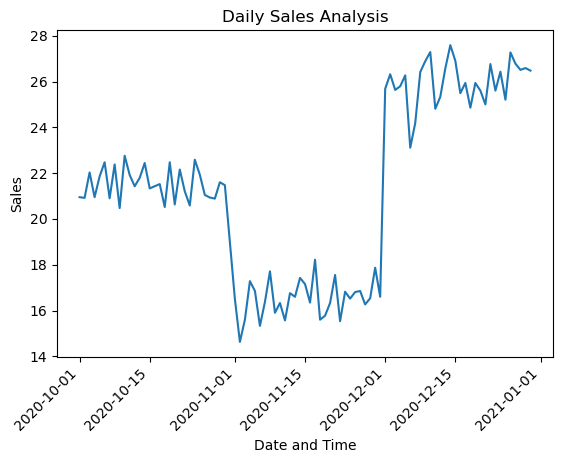

In [66]:
# Group by date and time for detailed sales analysis
daily_sales_day = df.groupby('Date')['Sales'].sum()
print(daily_sales_day)
daily_sales_day.plot(kind='line')
plt.title('Daily Sales Analysis')
plt.xlabel('Date and Time')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

Time
 Afternoon    643.857143
 Evening      631.666667
 Morning      645.126984
Name: Sales, dtype: float64


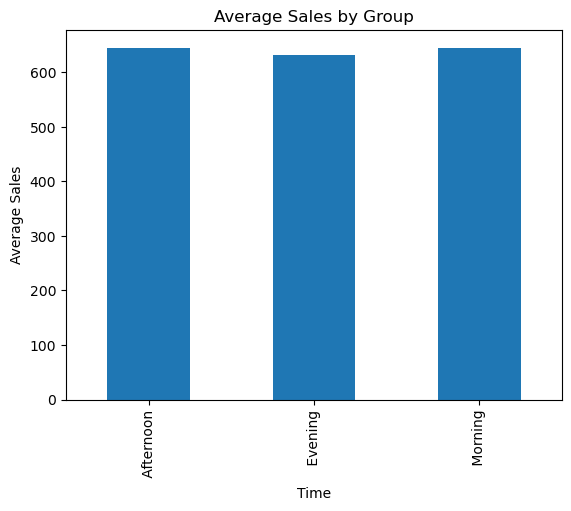

In [67]:
daily_sales_time = df.groupby('Time')['Sales'].sum()
print(daily_sales_time)
daily_sales_time.plot(kind='bar')
plt.title('Average Sales by Group')
plt.xlabel('Time')
plt.ylabel('Average Sales')
plt.show()

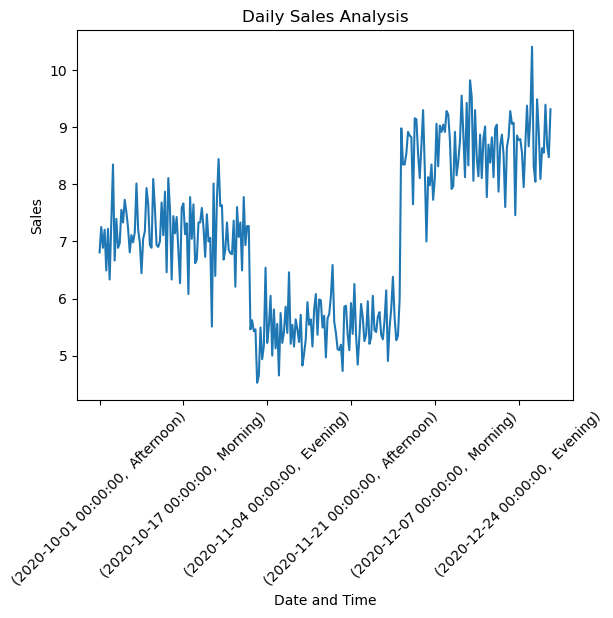

In [68]:
daily_sales = df.groupby(['Date', 'Time'])['Sales'].sum()
daily_sales.plot(kind='line')
plt.title('Daily Sales Analysis')
plt.xlabel('Date and Time')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

Unit
0.000000     0.000000
0.015873     3.809524
0.031746     6.666667
0.047619    15.761905
0.063492    23.492063
              ...    
0.936508     8.428571
0.952381     9.523810
0.968254    12.587302
0.984127    12.793651
1.000000    11.000000
Name: Sales, Length: 64, dtype: float64


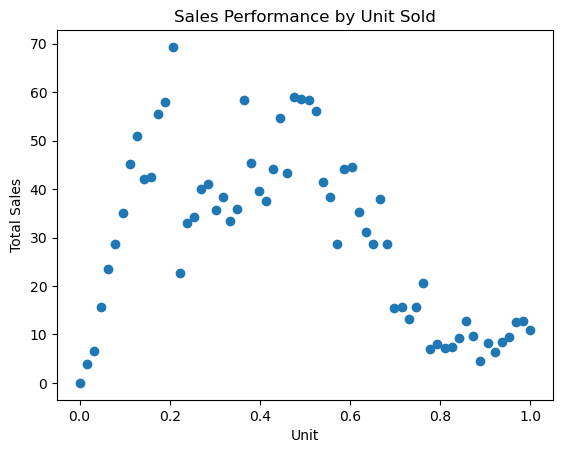

In [69]:
# Group by unit and analyze sales performance
unit_sales = df.groupby('Unit')['Sales'].sum()
print(unit_sales)
plt.scatter(unit_sales.index, unit_sales.values)
plt.title('Sales Performance by Unit Sold')
plt.xlabel('Unit')
plt.ylabel('Total Sales')
plt.show()

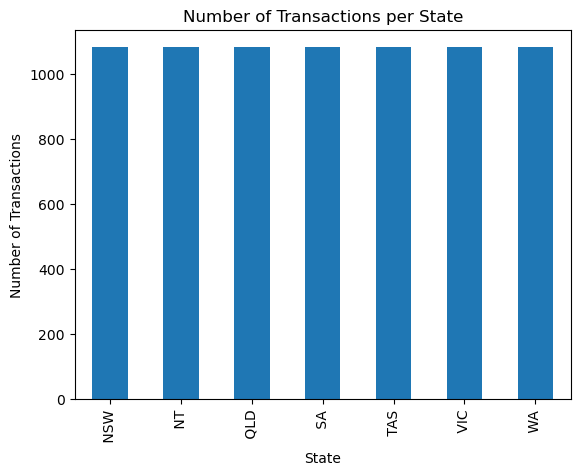

In [100]:
transactions_per_state = df.groupby('State')['Sales'].count()
transactions_per_state.plot(kind='bar')
plt.title('Number of Transactions per State')
plt.xlabel('State')
plt.ylabel('Number of Transactions')
plt.show()

Descriptive Statistics for Sales:
Mean: 0.25405433778449654
Median: 0.1904761904761905
Mode: 0.1111111111111111
Standard Deviation: 0.20478417107280047

Descriptive Statistics for Unit:
Mean: 0.2540543377844965
Median: 0.19047619047619047
Mode: 0.1111111111111111
Standard Deviation: 0.20478417107280045


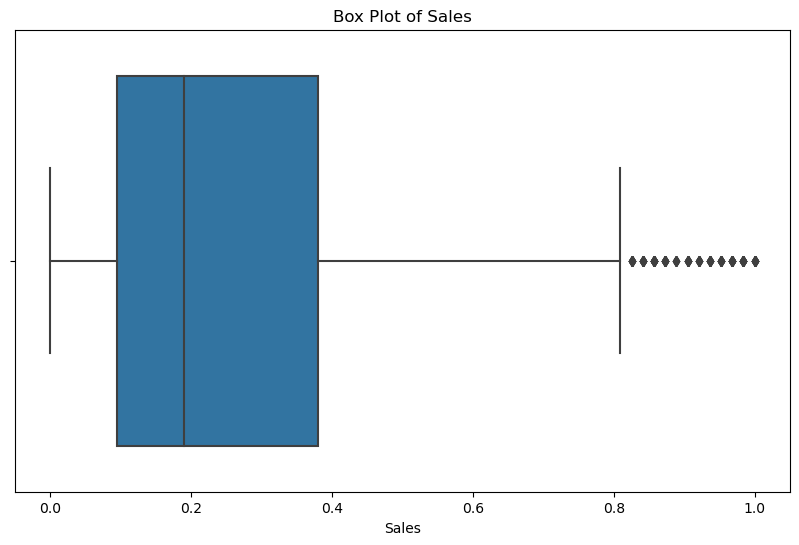

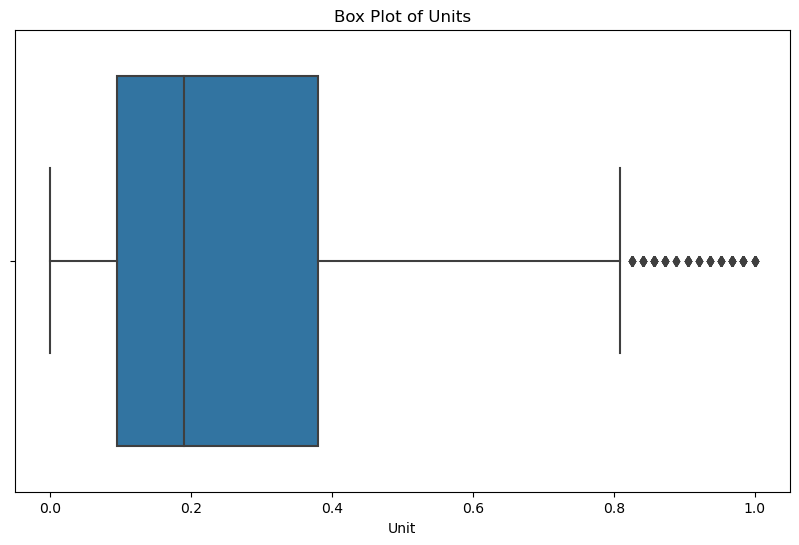

In [98]:
# Assuming df is your DataFrame
# First, ensure that 'Sales' and 'Unit' are in the correct numeric format
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Unit'] = pd.to_numeric(df['Unit'], errors='coerce')

# Calculate Descriptive Statistics
mean_sales = df['Sales'].mean()
median_sales = df['Sales'].median()
mode_sales = df['Sales'].mode()[0]  # mode() returns a Series, so we take the first element
std_sales = df['Sales'].std()

mean_unit = df['Unit'].mean()
median_unit = df['Unit'].median()
mode_unit = df['Unit'].mode()[0]  # mode() returns a Series, so we take the first element
std_unit = df['Unit'].std()

# Display the results
print("Descriptive Statistics for Sales:")
print(f"Mean: {mean_sales}")
print(f"Median: {median_sales}")
print(f"Mode: {mode_sales}")
print(f"Standard Deviation: {std_sales}")

print("\nDescriptive Statistics for Unit:")
print(f"Mean: {mean_unit}")
print(f"Median: {median_unit}")
print(f"Mode: {mode_unit}")
print(f"Standard Deviation: {std_unit}")


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sales')
plt.title('Box Plot of Sales')
plt.show()


# Box plot for Unit
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Unit')
plt.title('Box Plot of Units')
plt.show()

In [72]:
# Assuming df is your DataFrame and it has columns 'group' and 'sales'
# First, ensure that 'sales' is in the correct numeric format
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Group by 'group' and sum the 'sales'
group_sales = df.groupby('Group')['Sales'].sum()

# Find the group with the highest sales
highest_sales_group = group_sales.idxmax()
highest_sales_value = group_sales.max()

# Find the group with the lowest sales
lowest_sales_group = group_sales.idxmin()
lowest_sales_value = group_sales.min()

# Display the results
print(f"Group with the highest sales: {highest_sales_group} (Sales: {highest_sales_value})")
print(f"Group with the lowest sales: {lowest_sales_group} (Sales: {lowest_sales_value})")

Group with the highest sales:  Men (Sales: 484.44444444444446)
Group with the lowest sales:  Seniors (Sales: 473.57142857142856)


In [73]:
# Assuming df is your DataFrame and it has columns 'state' and 'sales'
# First, ensure that 'sales' is in the correct numeric format
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Group by 'state' and sum the 'sales'
state_sales = df.groupby('State')['Sales'].sum()

# Find the state with the highest sales
highest_sales_state = state_sales.idxmax()
highest_sales_value = state_sales.max()

# Find the state with the lowest sales
lowest_sales_state = state_sales.idxmin()
lowest_sales_value = state_sales.min()

# Display the results
print(f"State with the highest sales: {highest_sales_state} (Sales: {highest_sales_value})")
print(f"State with the lowest sales: {lowest_sales_state} (Sales: {lowest_sales_value})")


State with the highest sales:  VIC (Sales: 635.968253968254)
State with the lowest sales:  WA (Sales: 106.36507936507937)


In [74]:
# Assuming df is your DataFrame and it has a 'DateTime' column in datetime format
# Resample to weekly sales
weekly_sales = df.resample('W', on='Date')['Sales'].sum()

# Display weekly sales report
print("Weekly Sales Report:")
print(weekly_sales)

Weekly Sales Report:
Date
2020-10-04     84.857143
2020-10-11    152.777778
2020-10-18    150.476190
2020-10-25    151.587302
2020-11-01    122.460317
2020-11-08    113.809524
2020-11-15    115.761905
2020-11-22    115.380952
2020-11-29    117.698413
2020-12-06    169.412698
2020-12-13    181.492063
2020-12-20    182.317460
2020-12-27    183.047619
2021-01-03     79.571429
Freq: W-SUN, Name: Sales, dtype: float64


In [75]:
monthly_sales = df.resample('M', on='Date')['Sales'].sum()

# Display monthly sales report
print("Monthly Sales Report:")
print(monthly_sales)

Monthly Sales Report:
Date
2020-10-31    645.650794
2020-11-30    495.761905
2020-12-31    779.238095
Freq: M, Name: Sales, dtype: float64


In [76]:
quarterly_sales = df.resample('Q', on='Date')['Sales'].sum()

# Display quarterly sales report
print("Quarterly Sales Report:")
print(quarterly_sales)

Quarterly Sales Report:
Date
2020-12-31    1920.650794
Freq: Q-DEC, Name: Sales, dtype: float64


### Use appropriate data visualization libraries to build a dashboard for the Head of S&M that includes for the key parameters like 
#### State-wise sales analysis for different groups (kids, women, men, and seniors) 
#### Group-wise sales analysis (kids, women, men, and seniors) across different states.
#### Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest? [This helps S&M teams design programs for increasing sales such as hyper-personalization and Next Best Offers].


In [78]:
# Group by state and group
grouped_sales = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()


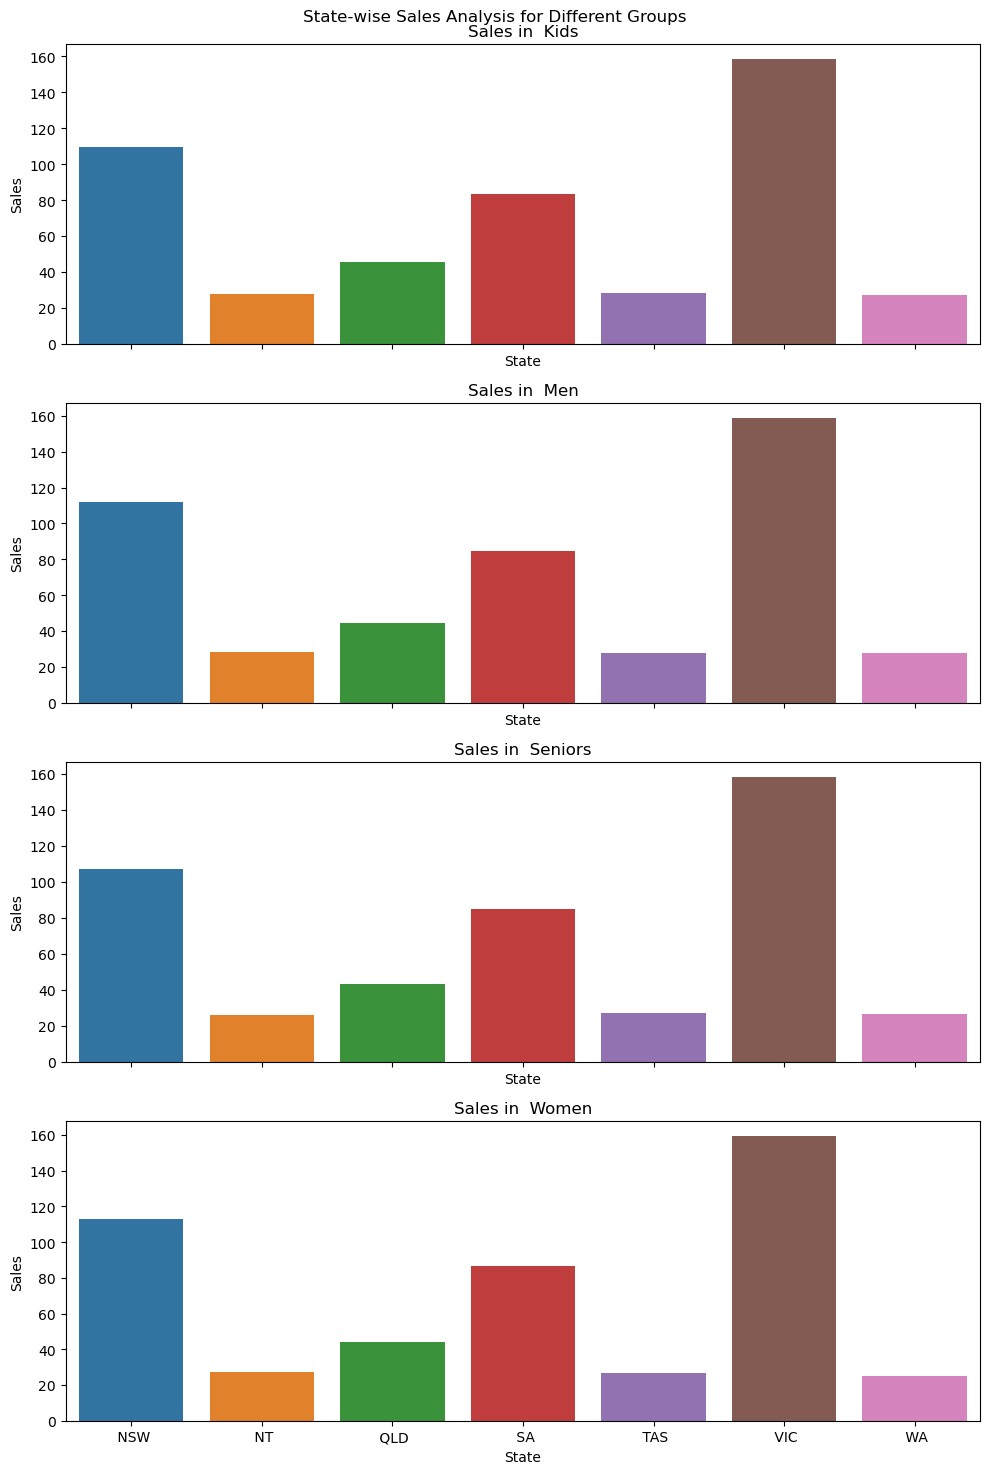

In [81]:
# Define the unique groups and states
groups = grouped_sales['Group'].unique()
states = grouped_sales['State'].unique()

# Create a figure with subplots - one for each group
fig, axes = plt.subplots(len(groups), 1, figsize=(10, 15), sharex=True)
fig.suptitle('State-wise Sales Analysis for Different Groups')

# Create a bar plot for each group
for i, group in enumerate(groups):
    ax = axes[i]
    group_data = grouped_sales[grouped_sales['Group'] == group]
    sns.barplot(x='State', y='Sales', data=group_data, ax=ax)
    ax.set_title(f'Sales in {group}')
    ax.set_ylabel('Sales')
    ax.set_xlabel('State')

# Adjust layout
plt.tight_layout()
plt.show()


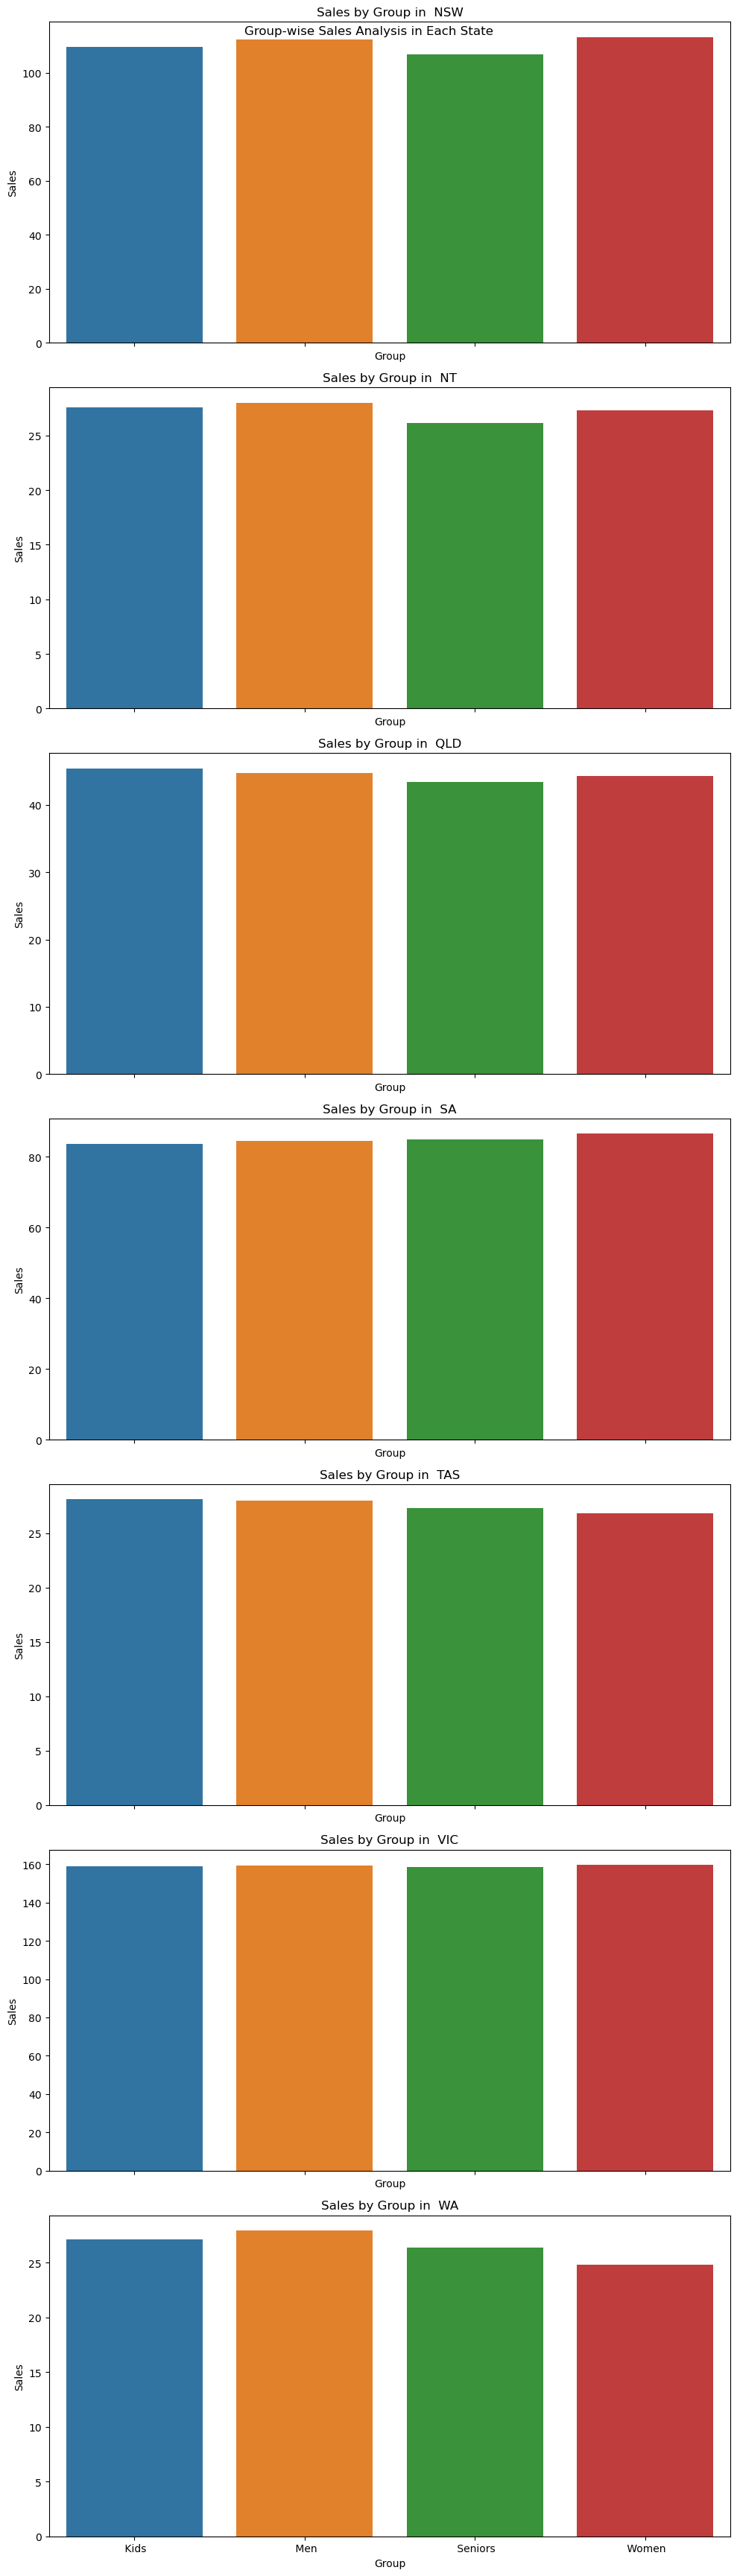

In [92]:
# Assuming grouped_sales is your prepared DataFrame
# Define the unique groups and states
groups = grouped_sales['Group'].unique()
states = grouped_sales['State'].unique()

# Create a figure with subplots - one for each state
fig, axes = plt.subplots(len(states), 1, figsize=(10, len(states) * 5), sharex=True)
fig.suptitle('Group-wise Sales Analysis in Each State')

# Verify if there's only one state, adjust axes to be an array
if len(states) == 1:
    axes = [axes]

# Create a bar plot for each state
for i, state in enumerate(states):
    ax = axes[i]
    group_data = grouped_sales[grouped_sales['State'] == state]
    sns.barplot(x='Group', y='Sales', data=group_data, ax=ax)
    ax.set_title(f'Sales by Group in {state}')
    ax.set_ylabel('Sales')
    ax.set_xlabel('Group')

# Adjust layout
plt.tight_layout()
plt.show()

Time with the highest sales:  Morning (Sales: 645.1269841269841)
Time with the lowest sales:  Evening (Sales: 631.6666666666666)


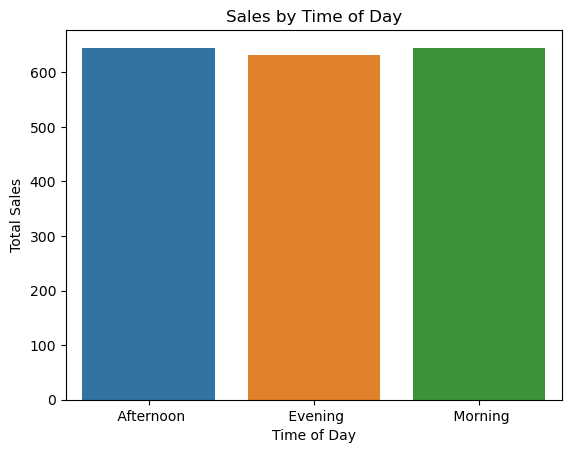

In [95]:
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Group by 'Time' and sum the 'Sales'
time_sales = df.groupby('Time')['Sales'].sum()

# Determine the time period with the highest and lowest sales
highest_sales_time = time_sales.idxmax()
highest_sales_value = time_sales.max()
lowest_sales_time = time_sales.idxmin()
lowest_sales_value = time_sales.min()

# Display the results
print(f"Time with the highest sales: {highest_sales_time} (Sales: {highest_sales_value})")
print(f"Time with the lowest sales: {lowest_sales_time} (Sales: {lowest_sales_value})")

sns.barplot(x=time_sales.index, y=time_sales.values)
plt.title('Sales by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.show()

#### The combination of Matplotlib and Seaborn provides both the power and simplicity needed for your sales data analysis.